In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

notes:
- if you search for "##", you should be able to see results that I thought were useful
- you will have to specify the path for the folder containing images (in the display_images() function)

questions that seem useful for filtering:
- Is a microphone or headset visible in the image? (yes)
- Is the entire background one solid color and material? (yes)
- Are there multiple screens in the image? (yes)
- Is the wider room clearly visible? (no)

In [349]:
data = pd.read_csv("output.csv")

In [350]:
"""
method to easily display a filtered section of images
params:
df: full dataframe with all questions and answers
question_num: desired filter question num (indexed 0-7)
answer: desired answer string ("yes", "no")
conf_level: returns images with confidence score > conf_level
num_images (optional): the number of images to display (default all the images that fit the given criteria)
show_images (option): if false, images will not be displayed (default true)
"""

def display_images(df, question_num, answer, conf_level, num_images=0, show_images=True):
    # specify folder path here
    folder_path = Path("../img_subset")

    confidence_label = "confidence_score_" + str(question_num)
    answer_label = "answer_" + str(question_num)

    selected_imgs = df[df[confidence_label] > conf_level]
    selected_imgs = selected_imgs[selected_imgs[answer_label] == answer]

    display_urls = selected_imgs.image_filename

    width = 20
    if (num_images == 0):
        num_images = len(display_urls)
    height = (num_images//6 + 1)*2

    if show_images:
        fig = plt.figure(figsize=(width, height))
        plt.subplots_adjust(left = 0.1, wspace = 0.1, hspace=0.1)

        for i in range(num_images):
            ax = plt.subplot(num_images//6+1, 6, i+1)
            ax.axis("off")
            full_path = folder_path / display_urls.iloc[i]
            image = Image.open(str(full_path))
            plt.imshow(image)
    
    percentage = round((len(display_urls)/len(df)), 3)
    print("Proportion of original set: " + str(percentage))
    

Question 0: Is a microphone or headset visible in the image?

Proportion of original set: 0.025


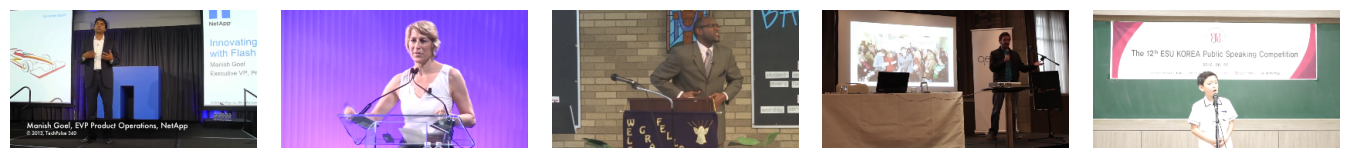

In [351]:
display_images(data, 0, "yes", 0.6)
# results: pretty good, 0.6 confidence has about 80% accuracy, 0.65 has 100%
## seems useful for removing images

In [352]:
display_images(data, 0, "no", 0.3, show_images=False)
# results: good accuracy, but not super useful for cutting size down usefully (since a lot of good images are lost)

Proportion of original set: 0.55


Question 1: Is there a whiteboard/blackboard in the background?

Proportion of original set: 0.065


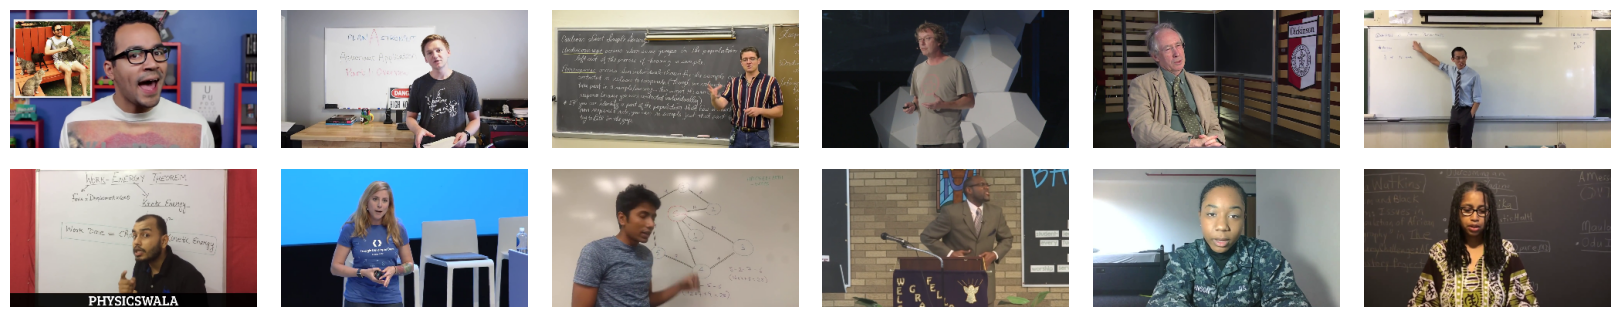

In [353]:
display_images(data, 1, "yes", 0.98, num_images=12)
# results: not great, contains a good number of images that might be useful for model

In [354]:
display_images(data, 1, "no", 0.95, show_images=False)
# results: not great, contains a lot of images with whiteboards

Proportion of original set: 0.555


Question 2: Is the entire background one solid color and material?

Proportion of original set: 0.355


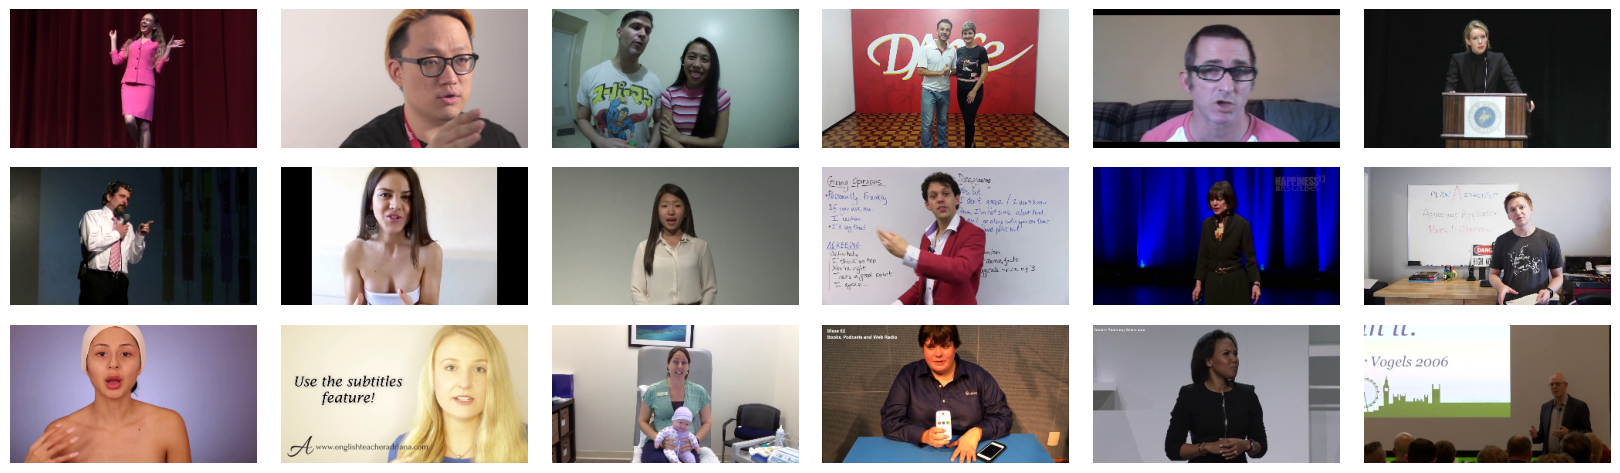

In [355]:
display_images(data, 2, "yes", 0.99, num_images=18)
# results: pretty good, does contains some potentiall useful images
## seems useful for filtering out a big chunk of images

Proportion of original set: 0.165


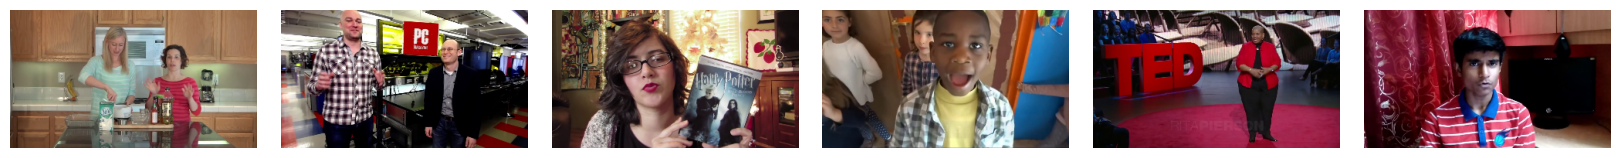

In [356]:
display_images(data, 2, "no", 0.3, num_images=6)
# results: okay, contains a lot of images that are very cluttered (might not be ideal for model)

Question 3: Is there a large projector screen covering most of the background?

Proportion of original set: 0.225


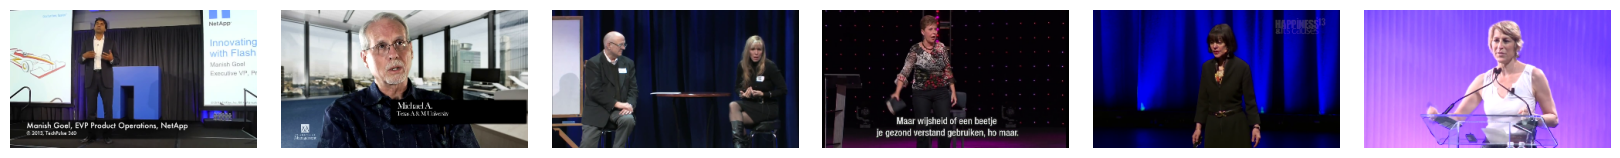

In [357]:
display_images(data, 3, "yes", 0.95, num_images=6)
# results: not good

Question 4: Is part or all of the background virtual?

Proportion of original set: 0.065


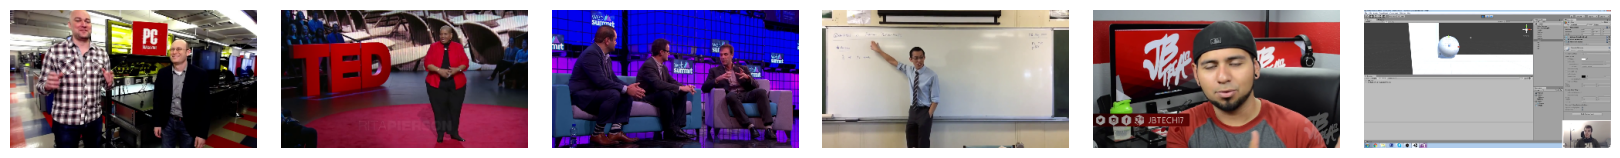

In [358]:
display_images(data, 4, "yes", 0.5, num_images=6)
#results: not good

In [359]:
display_images(data, 4, "no", 0.3, show_images=False)
# results: not good

Proportion of original set: 0.2


Question 5: Are there multiple screens in the image?

Proportion of original set: 0.1


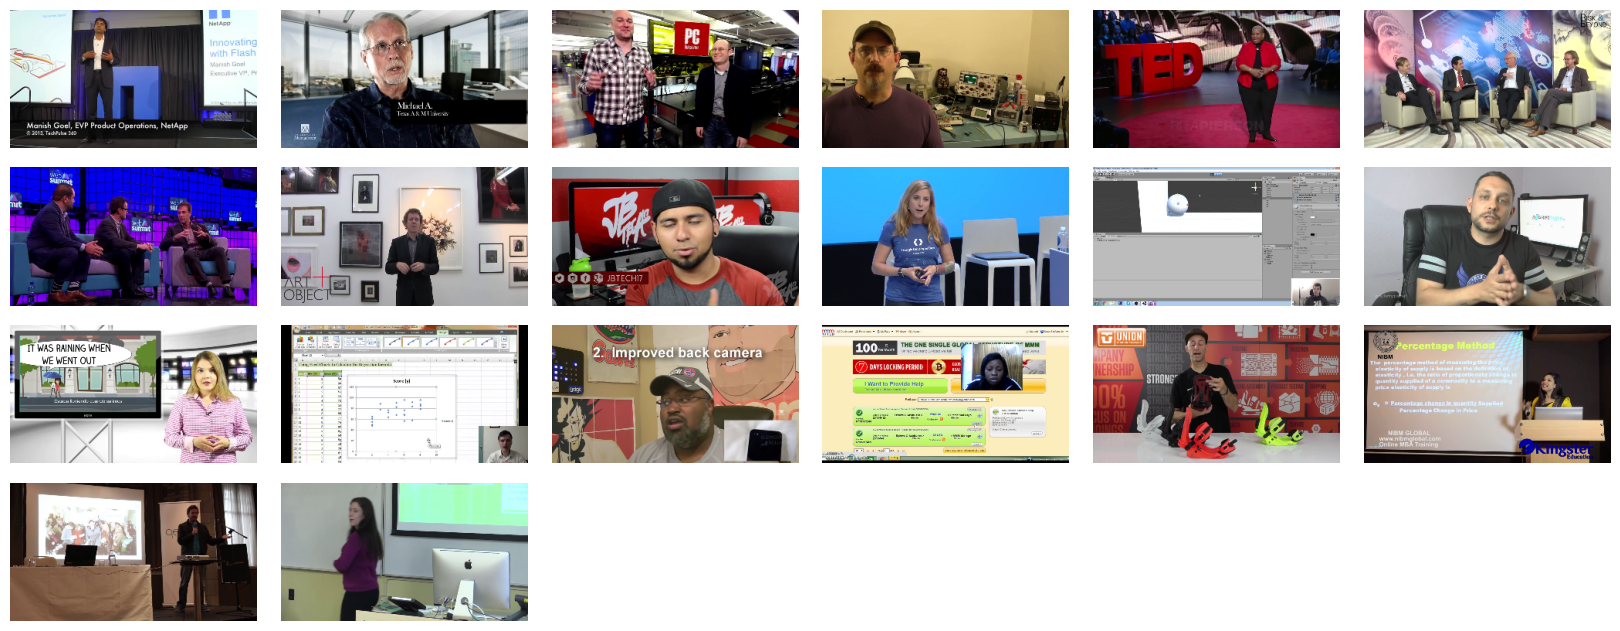

In [360]:
display_images(data, 5, "yes", 0.95)
## potetially useful, most of these images do not seem useful for training

Question 6: Are the floor and wall both visible?

In [361]:
display_images(data, 6, "yes", 0.9, show_images=False)
display_images(data, 6, "no", 0.9, show_images=False)
# results: not great, the classification seems pretty arbitrary

Proportion of original set: 0.14
Proportion of original set: 0.42


Question 7: Is the wider room clearly visible?

Proportion of original set: 0.18


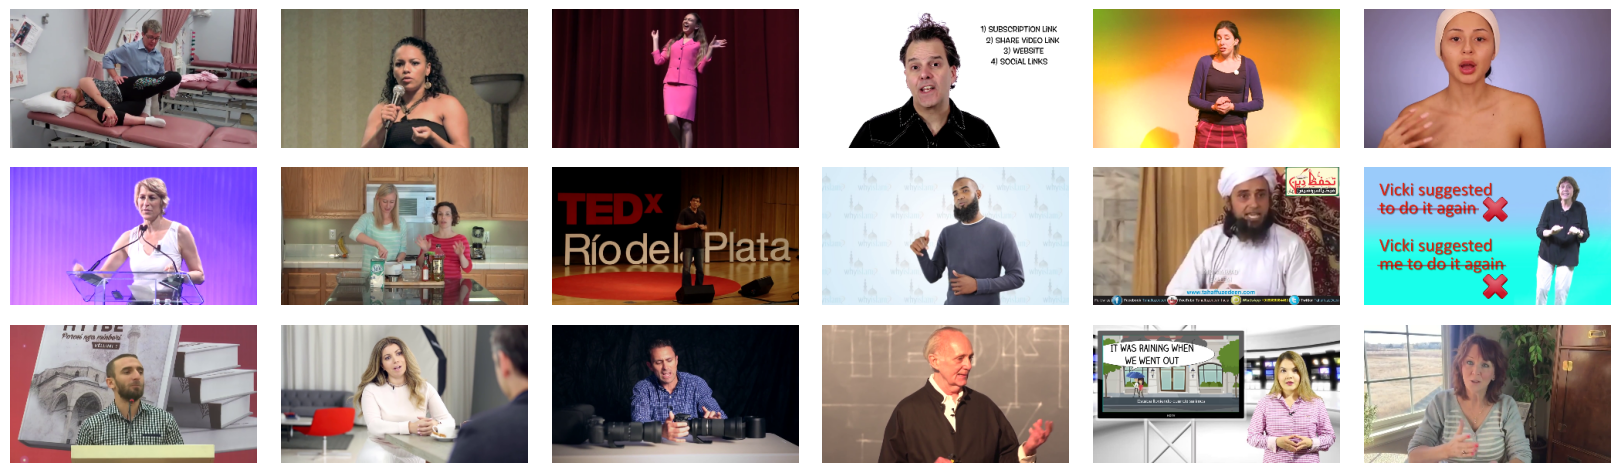

In [362]:
display_images(data, 7, "no", 0.95, num_images=18)
# results: mostly good, might cause us to lose some useful images
## potentially useful to remove around 10-20% of the images